<a href="https://colab.research.google.com/github/nailimmnh/PORTOFOLIO/blob/main/MachineLearningPortofolio/Customer%20Churn%20Analysis/Customer%20Churn%20ANN%20vs%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
# !pip install keras-tuner
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, classification_report

Link dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# **Load Dataset**

In [ ]:
# Import file csv
df = pd.read_csv('/content/Churn_Modelling.csv')

# Display all columns
pd.set_option('display.max_columns',None)

# Print dataframe
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **Data Cleaning**

In [ ]:
# Inspect dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Drop Unwanted Columns
df.drop(['customerID'], axis=1, inplace=True)

# Data Types Fixing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop Missing Values
df.dropna(inplace=True)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# **EDA**

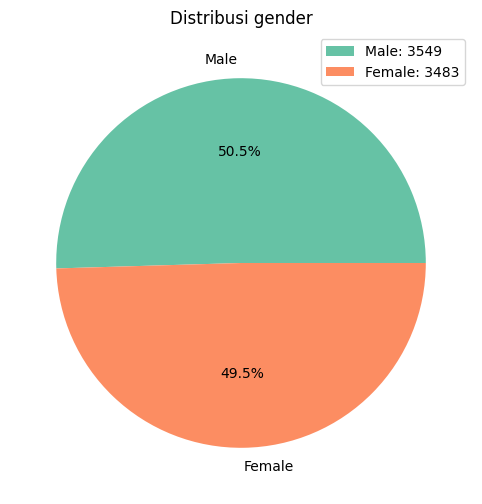

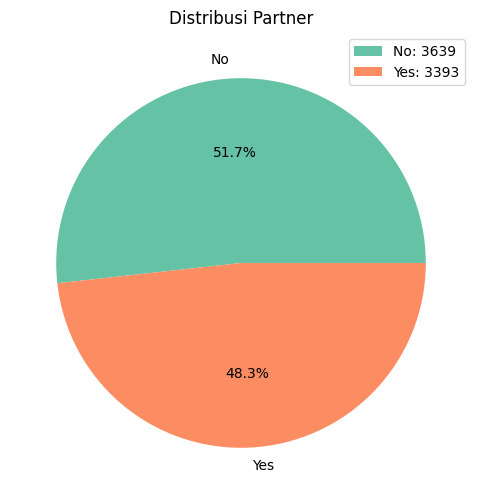

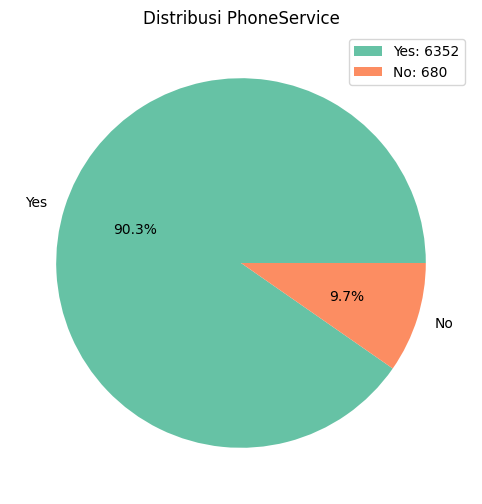

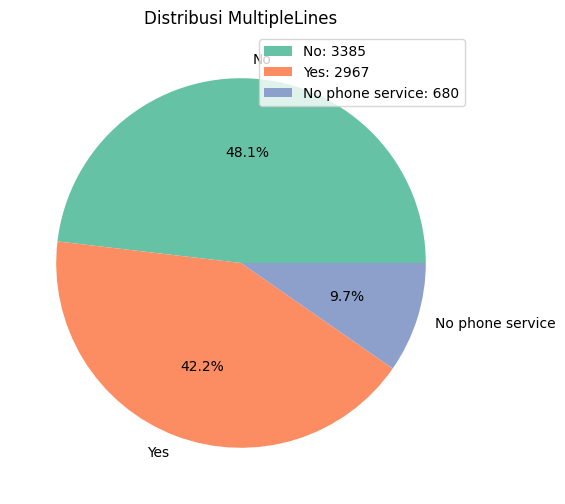

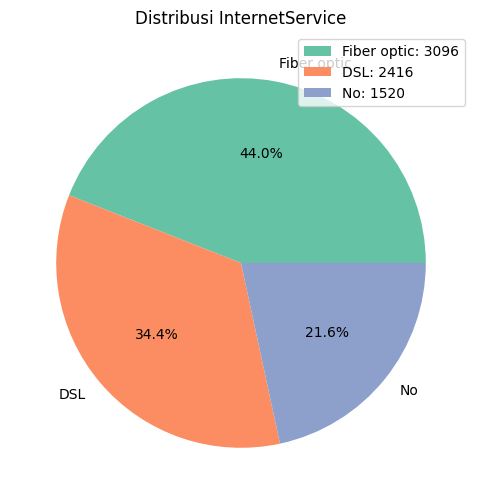

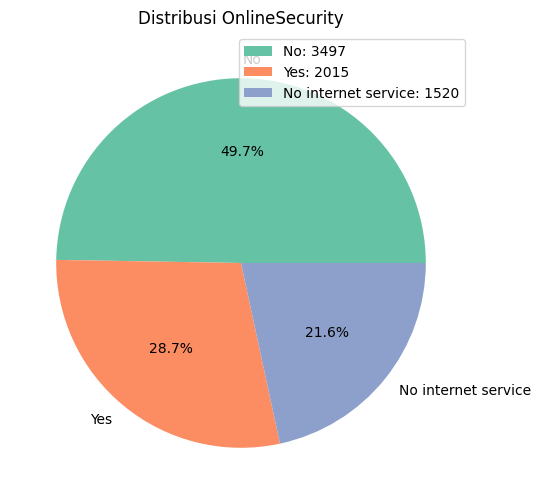

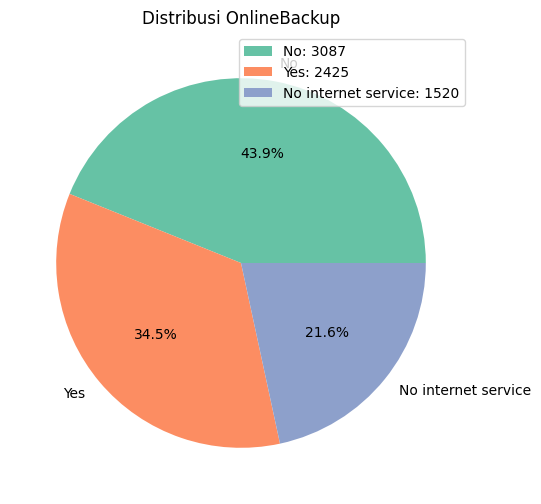

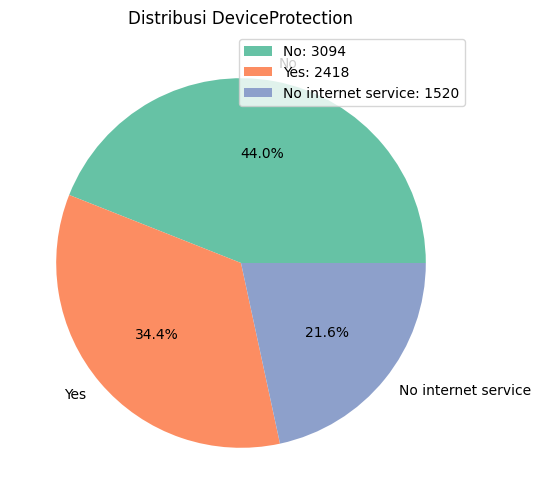

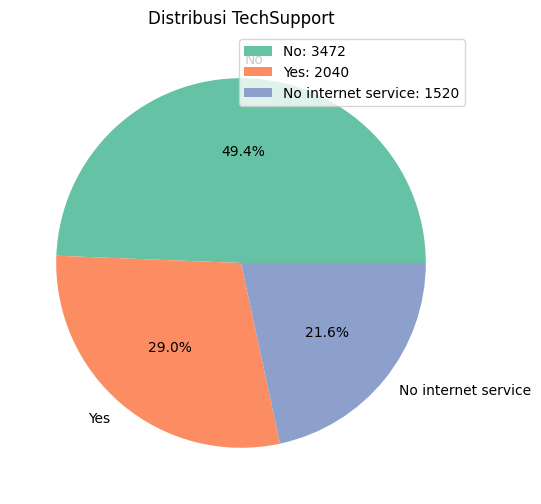

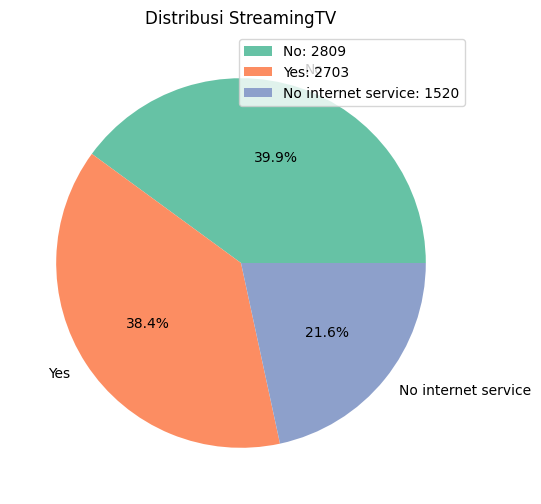

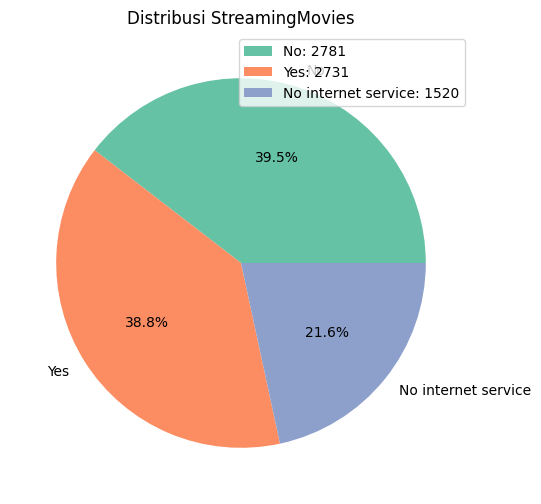

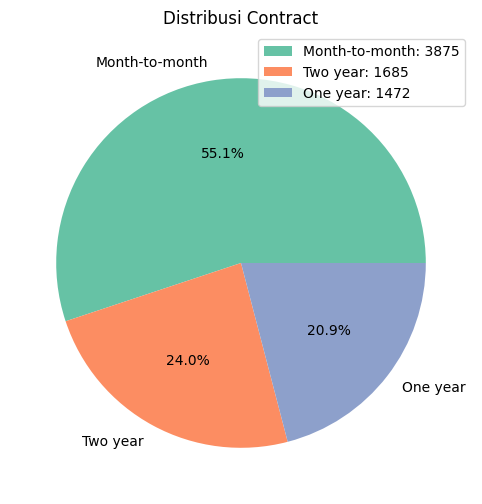

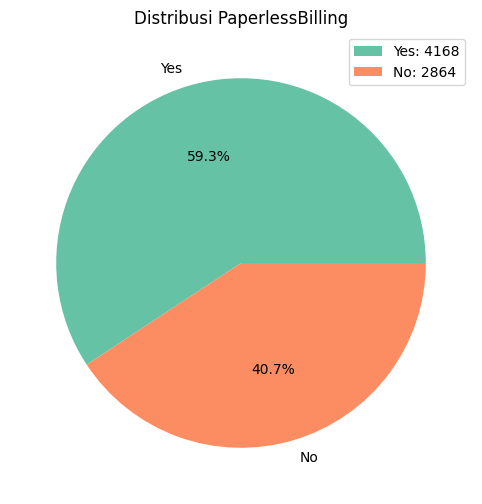

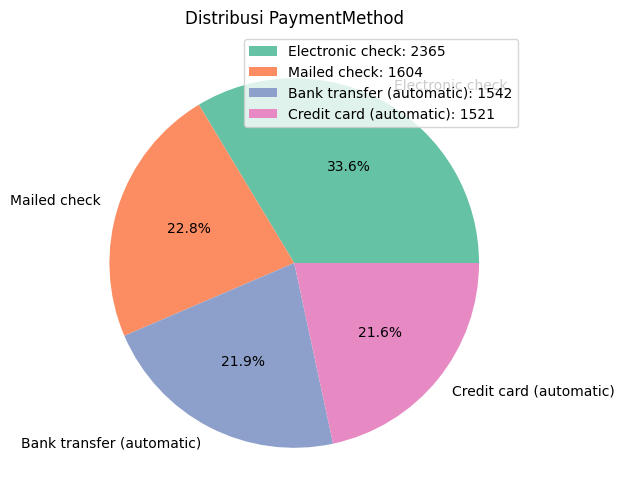

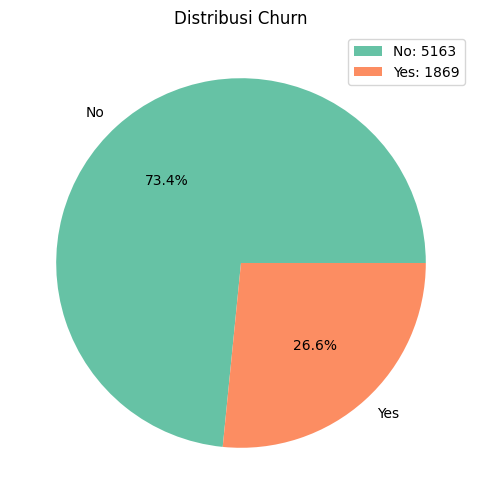

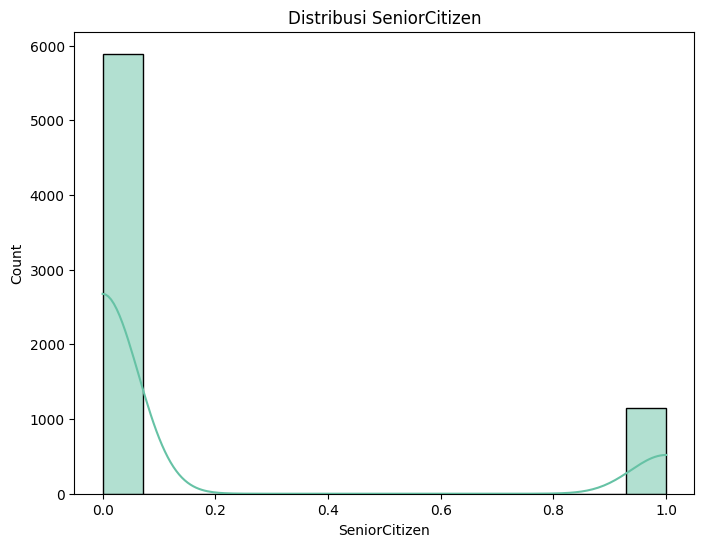

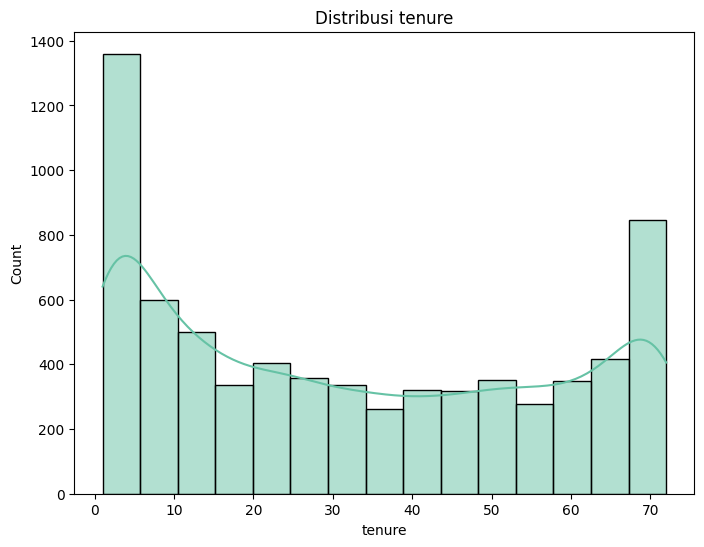

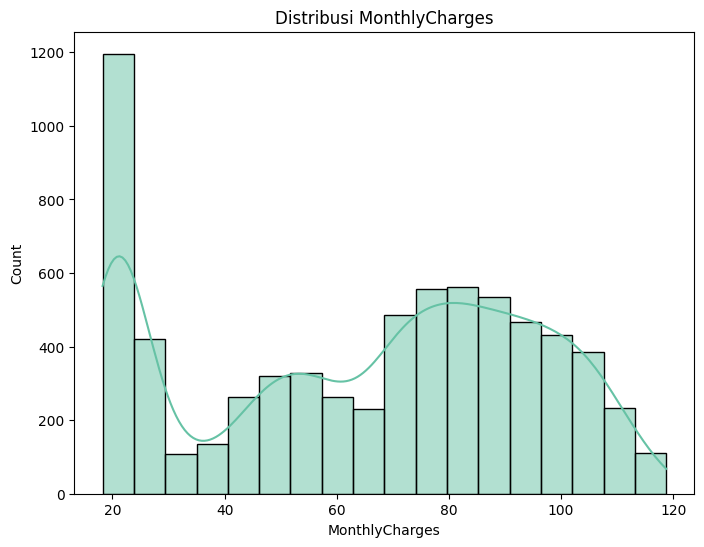

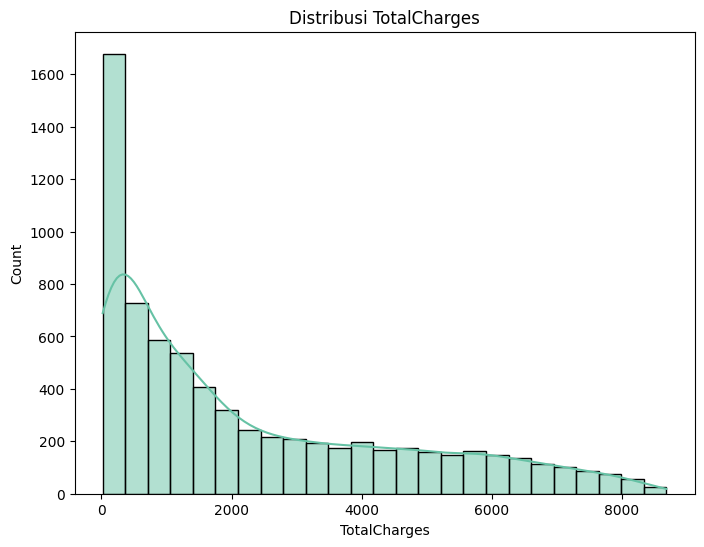

In [ ]:
# Categorical Features
categorical_features = ['gender', 'Partner', 'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                        'PaymentMethod', 'Churn']

# Numerical Features
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges']

# Set color palette
palette = sns.color_palette('Set2')

# Visualisasi Categorical Features
for feature in categorical_features:
      plt.figure(figsize=(8, 6))
      counts = df[feature].value_counts()
      plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=palette)
      plt.title(f'Distribusi {feature}')
      plt.legend(labels=[f'{label}: {count}' for label, count in zip(counts.index, counts)], loc='upper right')

# Visualisasi Numerical Features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, color=palette[0])
    plt.title(f'Distribusi {feature}')
    plt.show()

# Visualisasi TotalCharges (perlu diubah ke numerical terlebih dahulu)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalCharges'], kde=True, color=palette[0])
plt.title('Distribusi TotalCharges')
plt.show()

# **Encoding Categorical Data**

In [ ]:
for column in df:
  print(f'{column}: {df[column].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [ ]:
label_encoder = LabelEncoder()

for cat_col in df.select_dtypes('object').columns:
  if len(df[cat_col].unique()) == 2:
    df[cat_col] = label_encoder.fit_transform(df[cat_col])
  else:
    df = pd.get_dummies(data=df, columns=[cat_col])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False


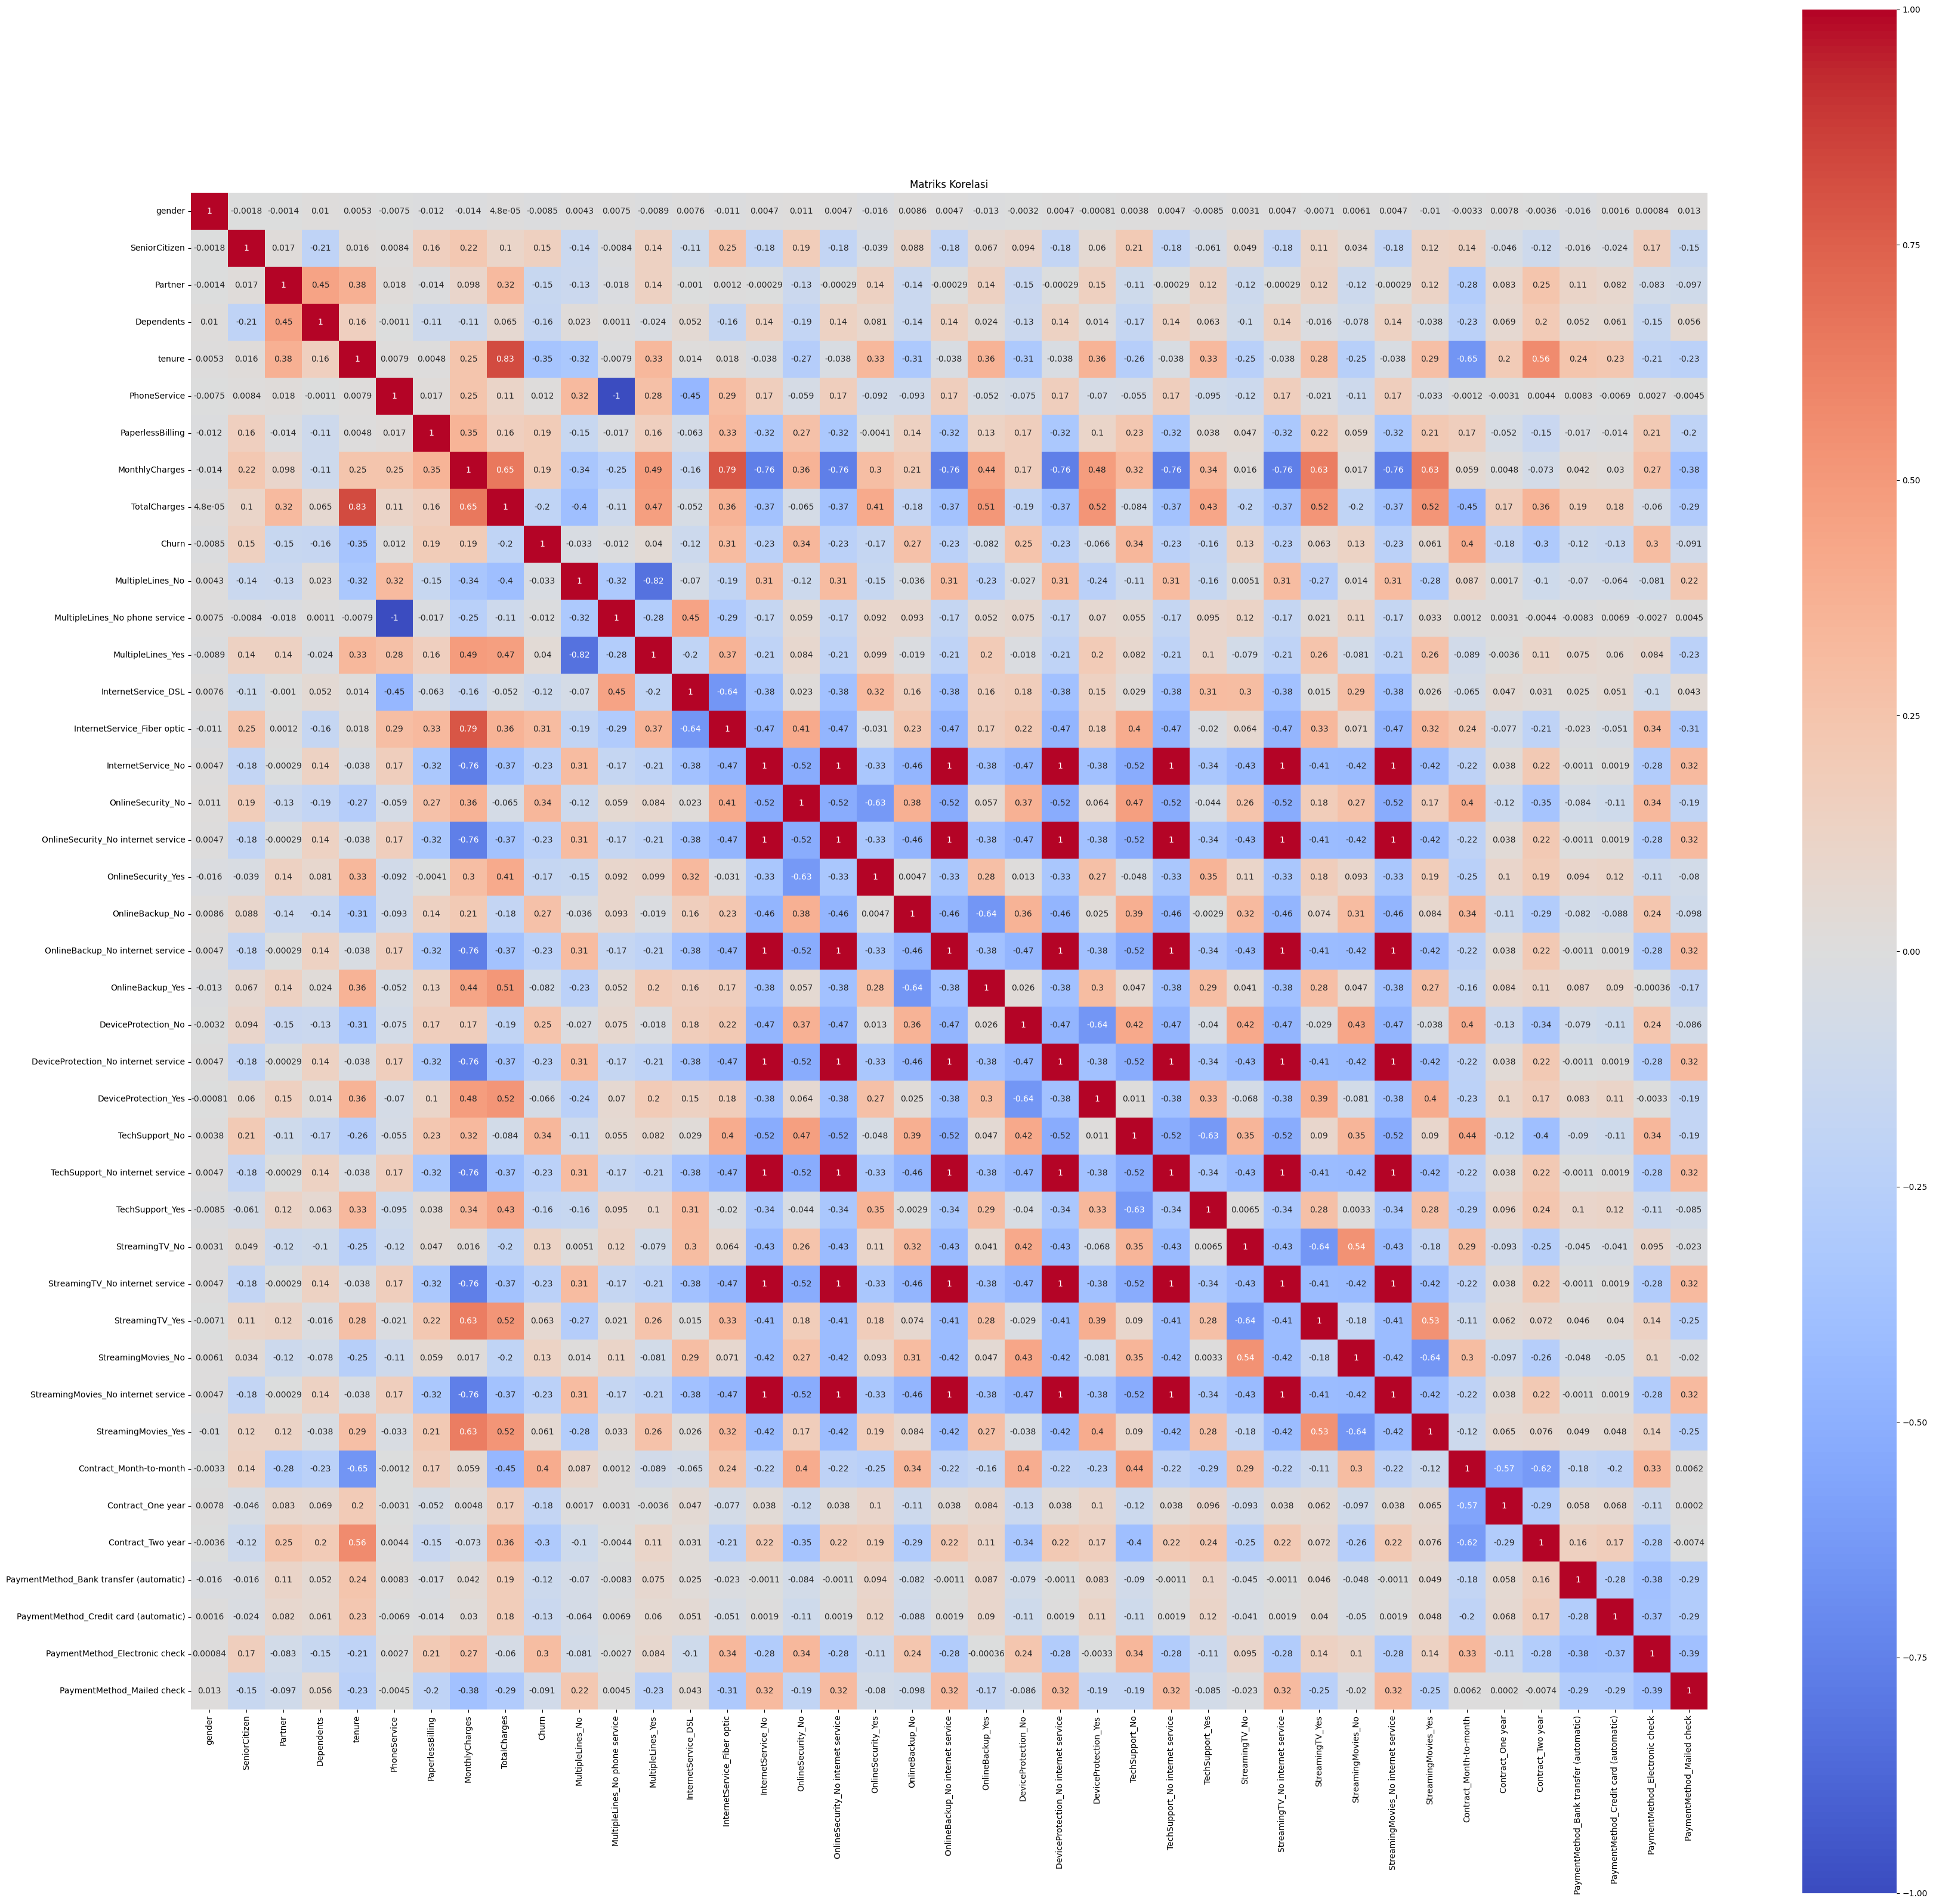

In [ ]:
# Matriks Korelasi
corr_matrix = df.corr()
n_features = len(corr_matrix.columns)
figsize = (n_features, n_features)
plt.figure(figsize=figsize)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriks Korelasi')
plt.show()

# **Normalize Numerical Features**

In [ ]:
# Seperate features abd target
X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,0.828939,-1.161694,-0.994194,-0.963411,3.056334,-0.854336,1.382243,-0.886896,-0.52513,1.005419,-0.52513,-0.633746,-0.884596,-0.52513,1.378330,1.128178,-0.52513,-0.723918,1.012594,-0.52513,-0.639260,1.226125,-0.52513,-0.790186,1.23636,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604
1,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-1.206361,-0.260878,-0.173740,1.037979,-0.327189,-0.854336,1.382243,-0.886896,-0.52513,-0.994611,-0.52513,1.577918,1.130460,-0.52513,-0.725516,-0.886385,-0.52513,1.381372,1.012594,-0.52513,-0.639260,1.226125,-0.52513,-0.790186,1.23636,-0.52513,-0.796849,-1.107895,1.943495,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
2,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,0.828939,-0.363923,-0.959649,1.037979,-0.327189,-0.854336,1.382243,-0.886896,-0.52513,-0.994611,-0.52513,1.577918,-0.884596,-0.52513,1.378330,1.128178,-0.52513,-0.723918,1.012594,-0.52513,-0.639260,1.226125,-0.52513,-0.790186,1.23636,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
3,0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,-1.206361,-0.747850,-0.195248,-0.963411,3.056334,-0.854336,1.382243,-0.886896,-0.52513,-0.994611,-0.52513,1.577918,1.130460,-0.52513,-0.725516,-0.886385,-0.52513,1.381372,-0.987563,-0.52513,1.564308,1.226125,-0.52513,-0.790186,1.23636,-0.52513,-0.796849,-1.107895,1.943495,-0.561364,1.886879,-0.525351,-0.711863,-0.543604
4,-1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,0.828939,0.196178,-0.940457,1.037979,-0.327189,-0.854336,-0.723462,1.127527,-0.52513,1.005419,-0.52513,-0.633746,1.130460,-0.52513,-0.725516,1.128178,-0.52513,-0.723918,1.012594,-0.52513,-0.639260,1.226125,-0.52513,-0.790186,1.23636,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604


# **Split Data Into Training and Test Set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **ANN Model**

In [ ]:
# Define the ANN model
ann_model = Sequential()

# Input layer and first hidden layer
ann_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Second hidden layer
ann_model.add(Dense(units=32, activation='relu'))

# Third hidden layer
ann_model.add(Dense(units=16, activation='relu'))

# Output layer (binary classification)
ann_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping configuration
early_stopping = EarlyStopping(
    monitor='val_loss',
    restore_best_weights=True
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Training the ANN Model**

In [ ]:
model_ann = ann_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6903 - loss: 0.5863 - val_accuracy: 0.7769 - val_loss: 0.4479
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7916 - loss: 0.4497 - val_accuracy: 0.7956 - val_loss: 0.4211
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7953 - loss: 0.4269 - val_accuracy: 0.8027 - val_loss: 0.4145
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8018 - loss: 0.4161 - val_accuracy: 0.8044 - val_loss: 0.4134
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8012 - loss: 0.4109 - val_accuracy: 0.8018 - val_loss: 0.4126
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8071 - loss: 0.4033 - val_accuracy: 0.7893 - val_loss: 0.4225


## **Make Predictions**

In [ ]:
ann_y_pred = ann_model.predict(X_test)
ann_y_pred = (ann_y_pred > 0.5).astype(int)

# Reshape the arrays to be 1-dimensional
ann_y_pred_1d = ann_y_pred.reshape(-1)
y_test_1d = y_test.values.reshape(-1)

# Create a DataFrame with the predicted values and actual values
ann_y_pred_df = pd.DataFrame({'Predictions': ann_y_pred_1d, 'Actual': y_test_1d})
ann_y_pred_df

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Predictions,Actual
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
1402,0,0
1403,1,0
1404,0,0
1405,0,0


## **Model Evaluation**

In [ ]:
print(classification_report(y_test, ann_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1033
           1       0.60      0.58      0.59       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



Text(95.72222222222221, 0.5, 'Actual')

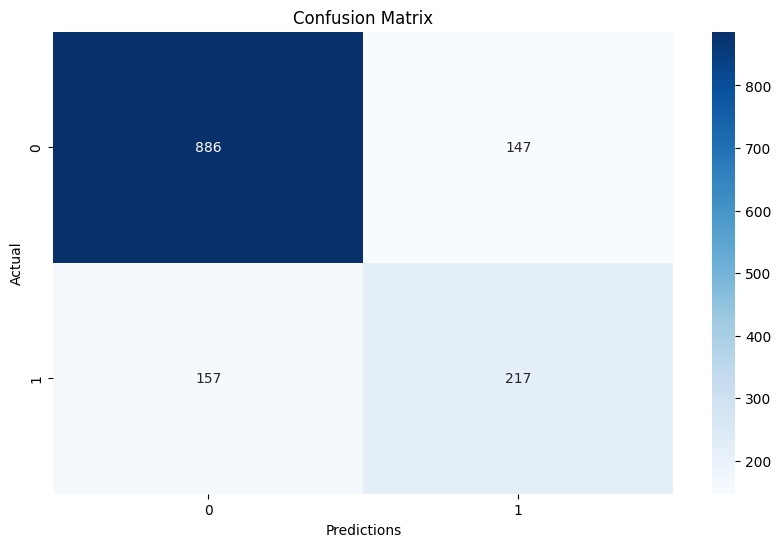

In [ ]:
cm = confusion_matrix(y_test, ann_y_pred)
plt.figure(figsize=(10, 6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predictions')
plt.ylabel('Actual')

# **CNN Model**

In [ ]:
X_scaled = np.expand_dims(X_scaled, axis=2)

# Split the data into training and testing sets
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Build the CNN model
cnn_model = Sequential()

# Add a 1D Convolutional layer
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a MaxPooling layer to reduce dimensionality
cnn_model.add(MaxPooling1D(pool_size=2))

# Flatten the output for the dense layer
cnn_model.add(Flatten())

# Add a dense layer
cnn_model.add(Dense(units=64, activation='relu'))

# Output layer (binary classification)
cnn_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Training the CNN Model**

In [ ]:
model_cnn = cnn_model.fit(X_train_cnn, y_train_cnn,
          epochs=50,
          batch_size=32,
          validation_split=0.2,
          callbacks=[early_stopping])

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7675 - loss: 0.4834 - val_accuracy: 0.8027 - val_loss: 0.4071
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7980 - loss: 0.4281 - val_accuracy: 0.8044 - val_loss: 0.4007
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8053 - loss: 0.4164 - val_accuracy: 0.8080 - val_loss: 0.3950
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7928 - loss: 0.4247 - val_accuracy: 0.7973 - val_loss: 0.4097
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7993 - loss: 0.4168 - val_accuracy: 0.8098 - val_loss: 0.3986
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8075 - loss: 0.4158 - val_accuracy: 0.8053 - val_loss: 0.4031
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8071 - loss: 0.4126 - val_accuracy: 0.8133 - val_loss: 0.3939
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8050 - loss: 0.4262 - val_accuracy: 0.

## **Make Predictions**

In [ ]:
cnn_y_pred = cnn_model.predict(X_test)
cnn_y_pred = (cnn_y_pred > 0.5).astype(int)

# Reshape the arrays to be 1-dimensional
cnn_y_pred_1d = cnn_y_pred.reshape(-1)
y_test_1d = y_test_cnn.values.reshape(-1)

# Create a DataFrame with the predicted values and actual values
cnn_y_pred_df = pd.DataFrame({'Predictions': cnn_y_pred_1d, 'Actual': y_test_1d})
cnn_y_pred_df

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Predictions,Actual
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
1402,0,0
1403,1,0
1404,0,0
1405,0,0


## **Model Evaluation**

In [ ]:
print(classification_report(y_test_cnn, cnn_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.52      0.55       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.77      0.77      1407



Text(95.72222222222221, 0.5, 'Actual')

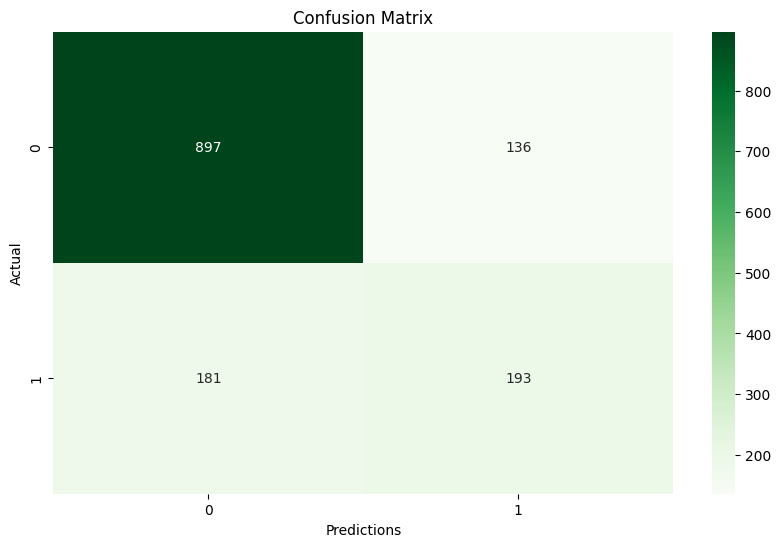

In [ ]:
cm = confusion_matrix(y_test, cnn_y_pred)
plt.figure(figsize=(10, 6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predictions')
plt.ylabel('Actual')

# **Perbandingan ANN dan CNN**

In [ ]:
# Evaluasi model dengan accuracy, recall, precision, f-score, AUC-ROC
ann_accuracy = accuracy_score(y_test, ann_y_pred)
ann_recall = recall_score(y_test, ann_y_pred)
ann_precision = precision_score(y_test, ann_y_pred)
ann_f_score = f1_score(y_test, ann_y_pred)
ann_auc_roc = roc_auc_score(y_test, ann_y_pred)

cnn_accuracy = accuracy_score(y_test, cnn_y_pred)
cnn_recall = recall_score(y_test, cnn_y_pred)
cnn_precision = precision_score(y_test, cnn_y_pred)
cnn_f_score = f1_score(y_test, cnn_y_pred)
cnn_auc_roc = roc_auc_score(y_test, cnn_y_pred)

# Buat tabel perbandingan evaluasi model
table = pd.DataFrame({
    'Model': ['ANN', 'CNN'],
    'Accuracy': [ann_accuracy, cnn_accuracy],
    'Recall': [ann_recall, cnn_recall],
    'Precision': [ann_precision, cnn_precision],
    'F1-Score': [ann_f_score, cnn_f_score],
    'AUC-ROC': [ann_auc_roc, cnn_auc_roc]
})

# Tampilkan tabel
tableX

,Model,Accuracy,Recall,Precision,F1-Score,AUC-ROC
0,ANN,0.783937,0.580214,0.596154,0.588076,0.718955
1,CNN,0.774698,0.516043,0.586626,0.549075,0.692194


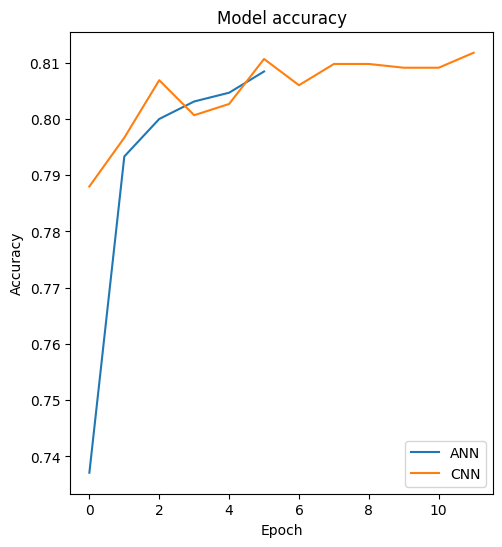

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(model_ann.history['accuracy'], label='ANN')
plt.plot(model_cnn.history['accuracy'], label='CNN')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

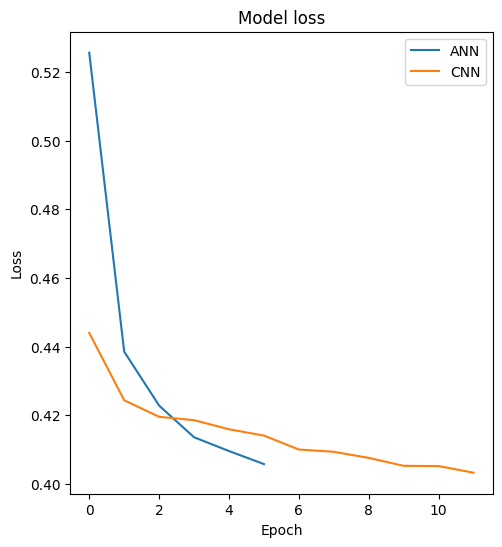

In [ ]:
# Plot loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(model_ann.history['loss'], label='ANN')
plt.plot(model_cnn.history['loss'], label='CNN')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')